In [1]:
!pip install -Uqq fastai
!pip install -Uqq opencv-python
!pip install -Uqq kaggle

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/dl')


Mounted at /content/drive


In [5]:
# from google.colab import files
# files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [9]:
# !kaggle datasets download gpreda/all-covid19-vaccines-tweets

 64% 19.0M/29.9M [00:00<00:00, 106MB/s] 
100% 29.9M/29.9M [00:00<00:00, 117MB/s]


In [10]:
# !unzip "/content/drive/MyDrive/dl/all-covid19-vaccines-tweets.zip" -d "/content/drive/MyDrive/dl/tweets"
# !unzip "/content/drive/MyDrive/dl/complete-tweet-sentiment-extraction-data.zip" -d "/content/drive/MyDrive/dl/tweets"

Archive:  /content/drive/MyDrive/dl/all-covid19-vaccines-tweets.zip
  inflating: /content/drive/MyDrive/dl/tweets/vaccination_all_tweets.csv  


In [3]:
import fastai.text.all as fsttext
import pandas as pd
import numpy as np

path = fsttext.Path('/content/drive/MyDrive/dl/tweets')
path.ls()

(#2) [Path('/content/drive/MyDrive/dl/tweets/tweet_dataset.csv'),Path('/content/drive/MyDrive/dl/tweets/vaccination_all_tweets.csv')]

In [4]:
tweets_df = pd.read_csv(path/'vaccination_all_tweets.csv')
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
tweets_sentiment = pd.read_csv(path/'tweet_dataset.csv')
tweets_sentiment.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


In [6]:
import re

def emoji_removal(input): return input.encode('ascii','ignore').decode('ascii')

# Code via https://www.kaggle.com/pawanbhandarkar/generate-smarter-word-clouds-with-log-likelihood
def tweet_proc(df, text_col='text'):
    df['orig_text'] = df[text_col]
    # Remove twitter handles
    df[text_col] = df[text_col].apply(lambda x:re.sub('@[^\s]+','',x))
    # Remove URLs
    df[text_col] = df[text_col].apply(lambda x:re.sub(r"http\S+", "", x))
    # Remove emojis
    df[text_col] = df[text_col].apply(emoji_removal)
    # Remove hashtags
    df[text_col] = df[text_col].apply(lambda x:re.sub(r'\B#\S+','',x))
    return df[df[text_col]!='']

tweets_sentiment = tweets_sentiment[['old_text','new_sentiment']].rename({'old_text':'text','new_sentiment':'sentiment'}, axis = 1)
tweets_df['sentiment']  = np.nan

tweets_sentiment = tweet_proc(tweets_sentiment)
tweets_df = tweet_proc(tweets_df)

df_lm = tweets_df[['text','sentiment']].append(tweets_sentiment[['text','sentiment']])
df_clas = df_lm.dropna(subset=('sentiment'))
df_clas.head()

<ipython-input-6-868a0ddc25dc>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lm = tweets_df[['text','sentiment']].append(tweets_sentiment[['text','sentiment']])


,text,sentiment
1,Layin n bed with a headache ughhhh...waitin on your call...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,"We want to trade with someone who has Houston tickets, but no one will.",neutral
5,Re-pinging why didn't you go to prom? BC my bf didn't like my friends,negative


In [7]:
dls_lm = fsttext.TextDataLoaders.from_df(df_lm, text_col = 'text', is_lm = True, valid_pct =0.1)
dls_lm.show_batch(max_n = 2)

,text,text_
0,"xxbos xxmaj wtf was that crap 5 mins before the marked closed … xxunk you cost me 4 grand xxbos xxmaj obligatory "" i got vaccinated "" selfie ! xxbos xxmaj the xxmaj philippines on xxmaj thursday received the eighth batch of xxmaj biotech 's coronavac vaccines purchased from xxbos xxmaj i 'm not really sure bout that . xxmaj maybe xxmaj you could .. xxmaj idk , xxmaj i 've never","xxmaj wtf was that crap 5 mins before the marked closed … xxunk you cost me 4 grand xxbos xxmaj obligatory "" i got vaccinated "" selfie ! xxbos xxmaj the xxmaj philippines on xxmaj thursday received the eighth batch of xxmaj biotech 's coronavac vaccines purchased from xxbos xxmaj i 'm not really sure bout that . xxmaj maybe xxmaj you could .. xxmaj idk , xxmaj i 've never bought"
1,how to get xxmaj vaccination xxmaj slot i xxmaj covid 19 via xxbos xxmaj traditional vaccine waiting in the wings to xxunk effective ag xxbos xxmaj your xxunk is moving ? xxmaj are you sad ? xxbos xxmaj first dose . xxunk xxbos * hugs * i m glad you got to spend time with your mom . if your free tonight drop by for some spaghetti xxbos xxmaj it takes nearly,to get xxmaj vaccination xxmaj slot i xxmaj covid 19 via xxbos xxmaj traditional vaccine waiting in the wings to xxunk effective ag xxbos xxmaj your xxunk is moving ? xxmaj are you sad ? xxbos xxmaj first dose . xxunk xxbos * hugs * i m glad you got to spend time with your mom . if your free tonight drop by for some spaghetti xxbos xxmaj it takes nearly 2


In [8]:
learn = fsttext.language_model_learner(dls_lm, fsttext.AWD_LSTM, drop_mult = 0.3, metrics = [fsttext.accuracy, fsttext.Perplexity()] ).to_fp16()

SuggestedLRs(valley=0.0030199517495930195)

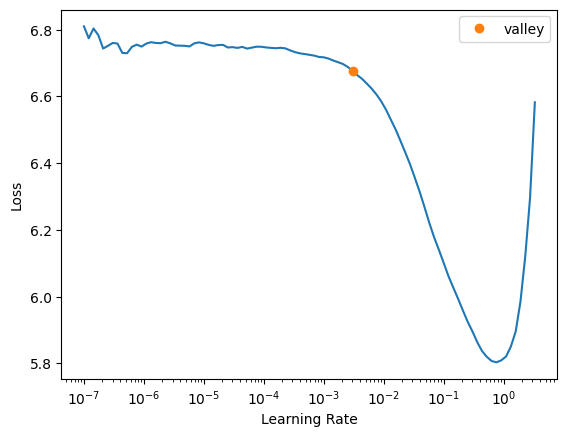

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(1, 3e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.252301,3.174250,0.439319,23.908890,05:07


SuggestedLRs(valley=0.0004786300996784121)

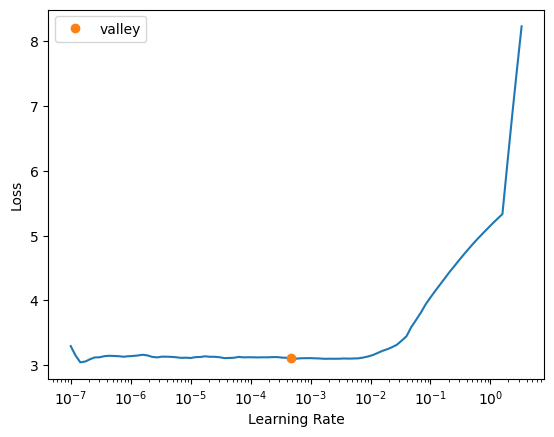

In [11]:
learn.unfreeze()
learn.lr_find()

In [12]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.946082,3.010976,0.460812,20.307217,05:12
1,2.806834,2.915116,0.474882,18.450954,05:15
2,2.680965,2.881169,0.482137,17.835108,05:17
3,2.582346,2.887464,0.483258,17.947741,05:19


In [13]:
learn.save_encoder('finetuned')
learn.save('1epoch')

Path('models/1epoch.pth')

In [16]:
TEXT = "COVID VACCINES are"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature = 0.80) for _ in range(N_SENTENCES)]

In [17]:
print("\n".join(preds))

COVID VACCINES are IN THE MAKING PUBLIC MEDIA AND NEWS ABOUT THE COMMUNIST BODY THAT ALLOW US there was a discussion on how to get a booster shot
COVID VACCINES are NOT SAFE EVERYONE ! How i feel after my second shot ! ! No side effects so far ! Pincode : 560038 
 COVAXIN - Dose 1 : 100 slots
